In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
file_path = "/content/Advertising.csv"
df = pd.read_csv(file_path)

In [3]:
# Drop the unnamed index column
df.drop(columns=['Unnamed: 0'], inplace=True)

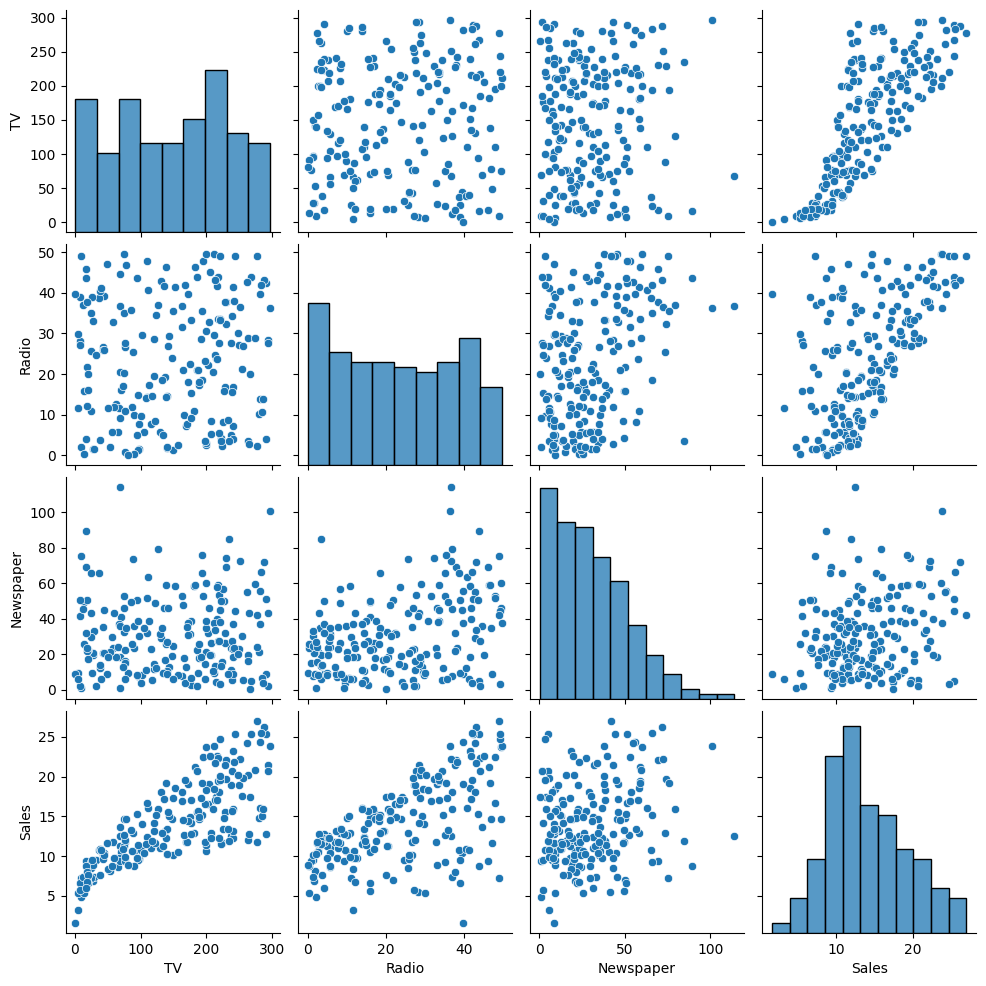

In [4]:
# Data Visualization
sns.pairplot(df)
plt.show()

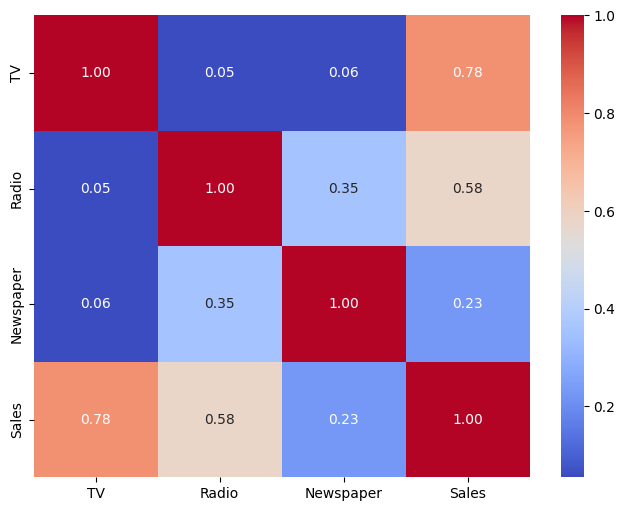

In [5]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [6]:
# Feature Engineering
X = df.drop(columns=['Sales'])
y = df['Sales']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predictions
y_pred = model.predict(X_test)

In [10]:
# Performance Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


MAE: 1.4607567168117601
MSE: 3.1740973539761064
RMSE: 1.7815996615334508
R-squared: 0.8994380241009119


In [11]:
# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean R-squared Score: {np.mean(cv_scores)}")

Cross-Validation R-squared Scores: [0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
Mean R-squared Score: 0.8871063495438435


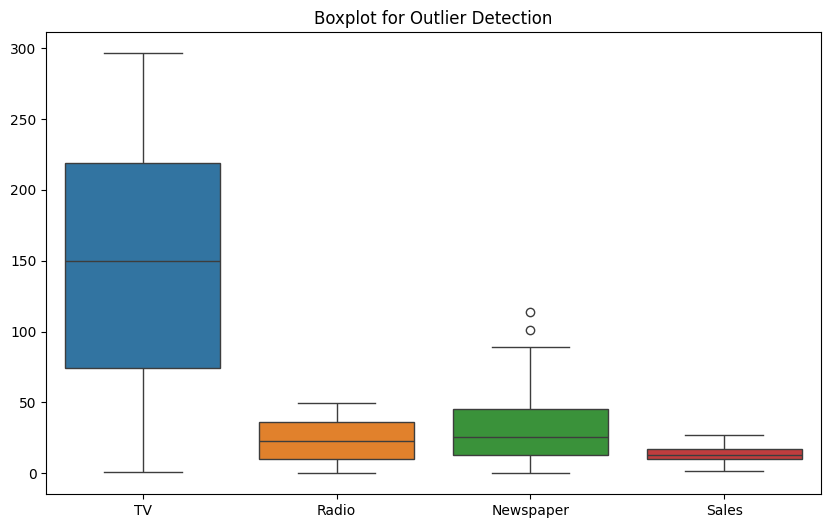

In [12]:
# Outlier Detection using Boxplots
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.show()

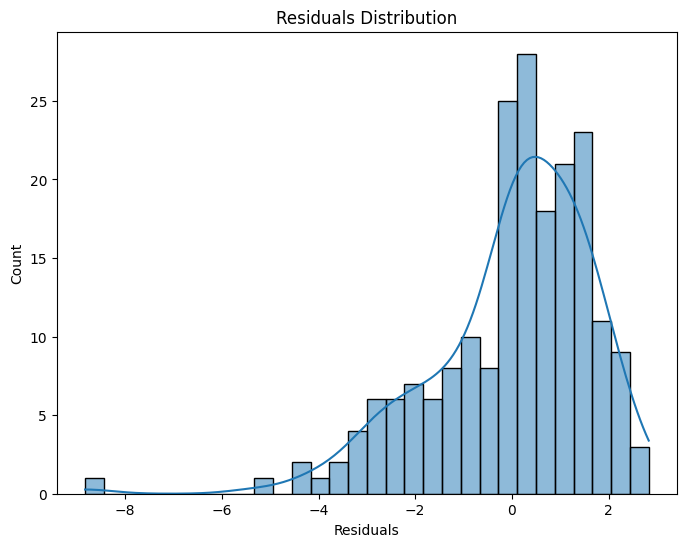

In [13]:
# Residual Analysis
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y)
y_pred = lin_reg.predict(X_scaled)

residuals = y - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

In [14]:
# Model Comparison
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR()
}

results = {}
for name, model in models.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    results[name] = {
        "MAE": mean_absolute_error(y, y_pred),
        "MSE": mean_squared_error(y, y_pred),
        "R2": r2_score(y, y_pred)
    }

In [15]:
# Display Results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                               MAE       MSE        R2
Linear Regression         1.252011  2.784126  0.897211
Decision Tree             0.000000  0.000000  1.000000
Random Forest             0.196335  0.063276  0.997664
Support Vector Regressor  0.704400  1.684949  0.937792


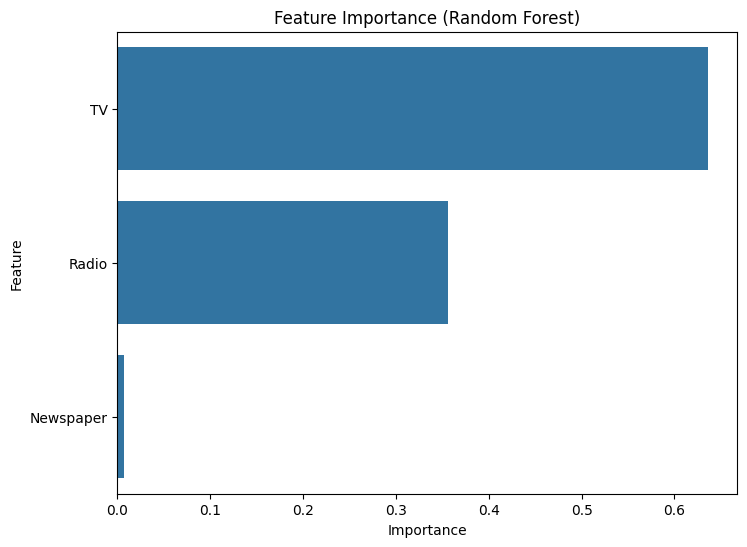

In [16]:
# Feature Importance for Tree-Based Models
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    feature_importances = rf_model.feature_importances_
    feature_names = df.drop(columns=['Sales']).columns

    plt.figure(figsize=(8,6))
    sns.barplot(x=feature_importances, y=feature_names)
    plt.title("Feature Importance (Random Forest)")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()

In [17]:
# Hyperparameter Tuning using GridSearchCV (for Random Forest)
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search.fit(X_scaled, y)

print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.9756714472027339
